In [9]:
import src.lfw_dataset as lfw
X_train, y_train, X_test, y_test = lfw.load_data()


Data already exist


images are same person


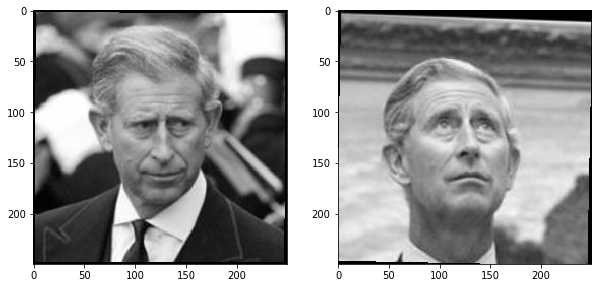

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# lets check that same images are really same person and vise versa
random_index = np.random.randint(0, len(y_train))

print('images are {} person'.format('same' if y_train[random_index] == 1 else 'not same'))

f, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(X_train[0][random_index].squeeze(),cmap='gray')
ax[1].imshow(X_train[1][random_index].squeeze(),cmap='gray')


In [4]:
from src.siamese import Siamese

s_net = Siamese(X_train, y_train)

In [5]:
model_obj = s_net.init_network()


Instructions for updating:
Colocations handled automatically by placer.


In [6]:
model_obj.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 250, 250, 1)  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 250, 250, 1)  0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, 200)          30686216    input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 200)          0           sequential[1][0]                 
          

In [4]:
history = model_obj.fit(X_train, y_train, batch_size=64, epochs=10, validation_split=.2, verbose=True)

NameError: name 'obj' is not defined

In [8]:
def evaluate(model, history, X_test, y_test):
    model.summary()
    loss, accuracy  = model.evaluate(X_test, y_test, verbose=False)

    fig, axes = plt.subplots(1, 2)
    fig.set_figheight(7)
    fig.set_figwidth(14)

    # plot accuracy 
    axes[0].plot(history.history['acc'])
    axes[0].plot(history.history['val_acc'])
    axes[0].set_title('model accuracy')
    axes[0].set_ylabel('accuracy')
    axes[0].set_xlabel('epoch')
    axes[0].legend(['training', 'validation'], loc='best')

    # plot loss
    axes[1].plot(history.history['loss'])
    axes[1].plot(history.history['val_loss'])
    axes[1].set_title('model loss')
    axes[1].set_ylabel('accuracy')
    axes[1].set_xlabel('epoch')
    axes[1].legend(['training', 'validation'], loc='best')


    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')#%%


 Volume in drive C has no label.
 Volume Serial Number is 5071-12F9

 Directory of C:\Msc\DeepLearning\Deep-Learning-Intro\assignment2

05/15/2019  02:41 PM    <DIR>          .
05/15/2019  02:41 PM    <DIR>          ..
05/15/2019  02:24 PM                15 .gitignore
05/17/2019  10:42 PM    <DIR>          .idea
05/15/2019  02:29 PM           383,979 Assignment 2 - Facial Recognition using one-shot learning (1).pdf
05/15/2019  02:28 PM    <DIR>          data
05/15/2019  02:24 PM               638 README.md
05/17/2019  10:42 PM    <DIR>          src
               3 File(s)        384,632 bytes
               5 Dir(s)  131,225,255,936 bytes free


In [ ]:
evaluate(model_obj, history, X_test, y_test)
